In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
from scipy import stats
from scipy.stats import norm
import sys
import math

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
def showImage(image):
    %matplotlib inline  

    plt.imshow(image, interpolation='nearest', cmap=plt.cm.get_cmap('viridis'))
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.show()
    
def showImage_cat(image,numCat):
    %matplotlib inline  

    plt.imshow(image, interpolation='nearest', cmap=plt.cm.get_cmap('Greens', numCat))
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar(ticks=np.arange(numCat))
    plt.show()
    
def showBWImage(image):
    %matplotlib inline  

    plt.imshow(image, interpolation='nearest',cmap='gray')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.show()
    
def showImage_clim(image, minValue, maxValue):
    %matplotlib inline  

    plt.imshow(image, interpolation='nearest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.clim(minValue,maxValue)
    plt.show()
    
def showImage_autoSize(image):
    %matplotlib inline 

    plt.imshow(image,  aspect='auto', interpolation='none')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.show()

def showImage_autoSize_clim(image, minValue, maxValue):
    %matplotlib inline 

    plt.imshow(image,  aspect='auto', interpolation='none')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.colorbar()
    plt.clim(minValue,maxValue)
    plt.show()

In [5]:
XDIM = 250
YDIM = 250
ZDIM = 50

numVar = 2

In [7]:
raw_data = np.zeros((numVar,ZDIM,YDIM,XDIM))

temp_data = np.fromfile("/home/hazarika/visData/isabel_MV_t20/Pf20.binLE.raw_corrected_2_subsampled", dtype=np.float32)
raw_data[0] = temp_data.reshape((ZDIM,YDIM,XDIM))

temp_data = np.fromfile("/home/hazarika/visData/isabel_MV_t20/Velocityf20.binLE.raw_corrected_2_subsampled", dtype=np.float32)
raw_data[1] = temp_data.reshape((ZDIM,YDIM,XDIM))


In [8]:
#currently working with 2d data in python for visualization
#store the extracted slices in separate array
raw_slice = np.zeros((numVar, YDIM,XDIM))
raw_slice[0] = raw_data[0][10]
raw_slice[1] = raw_data[1][10]

In [9]:
#new raw slice with spatial information
spatial_raw_slice = np.zeros((numVar+2, YDIM,XDIM))

spatial_raw_slice[0] = raw_data[0][10]
spatial_raw_slice[1] = raw_data[1][10]

for y in range(0,YDIM):
    for x in range(0,XDIM):
        spatial_raw_slice[2][y][x] = float(x)
        spatial_raw_slice[3][y][x] = float(y)
        




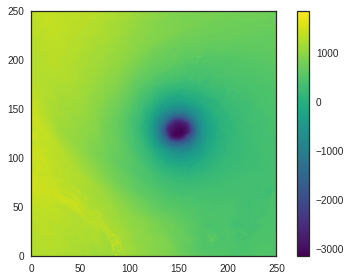

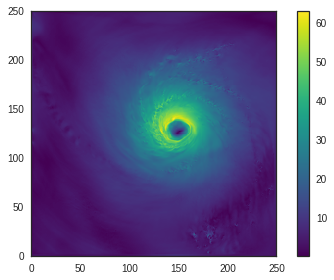

In [10]:
sns.set_style("white")
showImage(spatial_raw_slice[0])
showImage(spatial_raw_slice[1])

In [11]:
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [12]:
def show_jointDistribution(spatial_raw_slice, size):
    panda_raw_slice = np.zeros((numVar+2,size))
    panda_raw_slice[0] = spatial_raw_slice[0].flatten()
    panda_raw_slice[1] = spatial_raw_slice[1].flatten()
    panda_raw_slice[2] = spatial_raw_slice[2].flatten()
    panda_raw_slice[3] = spatial_raw_slice[3].flatten()

    df = pd.DataFrame(np.transpose(panda_raw_slice), columns=["pressure","velocity","Xspace", "Yspace"])

    sns.set_style("whitegrid")
    sns.pairplot(data=df, markers='+', plot_kws=dict(s=10,edgecolor="b",linewidth=1), diag_kws=dict())

    plt.show()

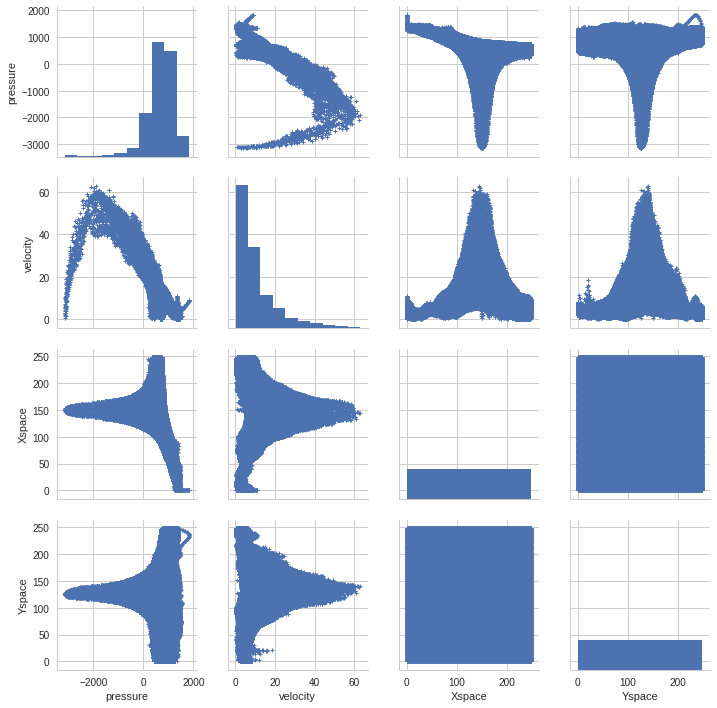

In [13]:
show_jointDistribution(spatial_raw_slice,YDIM*XDIM)

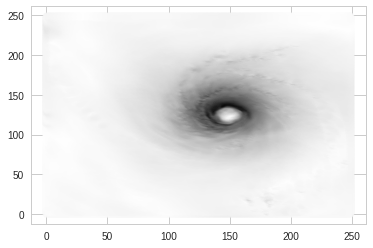

In [14]:
plt.scatter(spatial_raw_slice[2].flatten(), spatial_raw_slice[3].flatten(), c=spatial_raw_slice[1].flatten(), label=spatial_raw_slice[1].flatten(), alpha=0.5)
#plt.legend()
plt.show()

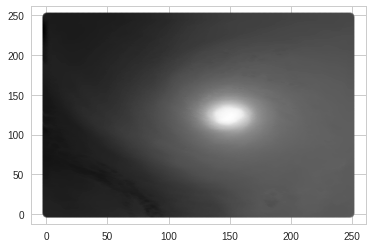

In [15]:
plt.scatter(spatial_raw_slice[2].flatten(), spatial_raw_slice[3].flatten(), c=spatial_raw_slice[0].flatten(), label=spatial_raw_slice[0].flatten(), alpha=0.5)
#plt.legend()
plt.show()

In [16]:
#store the downsampled arrays, includes the spatial data as well
stepSize = 10
downSampled_Array = np.zeros((numVar+2,(YDIM/stepSize)*(XDIM/stepSize),stepSize*stepSize))

idx = 0
for i in range(0,YDIM,stepSize):
    for j in range(0,XDIM,stepSize):
        c = 0
        for ii in range(i,i+stepSize):
            for jj in range(j,j+stepSize):
                downSampled_Array[0][idx][c] = spatial_raw_slice[0][ii][jj]
                downSampled_Array[1][idx][c] = spatial_raw_slice[1][ii][jj]
                downSampled_Array[2][idx][c] = spatial_raw_slice[2][ii][jj]
                downSampled_Array[3][idx][c] = spatial_raw_slice[3][ii][jj]
                c += 1 
        idx += 1

In [17]:
testArray = downSampled_Array[:,10,:]

In [18]:
testArray.shape

(4, 100)

In [19]:
def show_blockwise_JD(indata, size):
    panda_raw_slice = np.zeros((numVar+2,size))
    panda_raw_slice[0] = indata[0]
    panda_raw_slice[1] = indata[1]
    panda_raw_slice[2] = indata[2]
    panda_raw_slice[3] = indata[3]

    df = pd.DataFrame(np.transpose(panda_raw_slice), columns=["pressure","velocity","Xspace", "Yspace"])

    sns.set_style("whitegrid")
    sns.pairplot(data=df, markers='+', plot_kws=dict(s=10,edgecolor="b",linewidth=1), diag_kws=dict())

    plt.show()

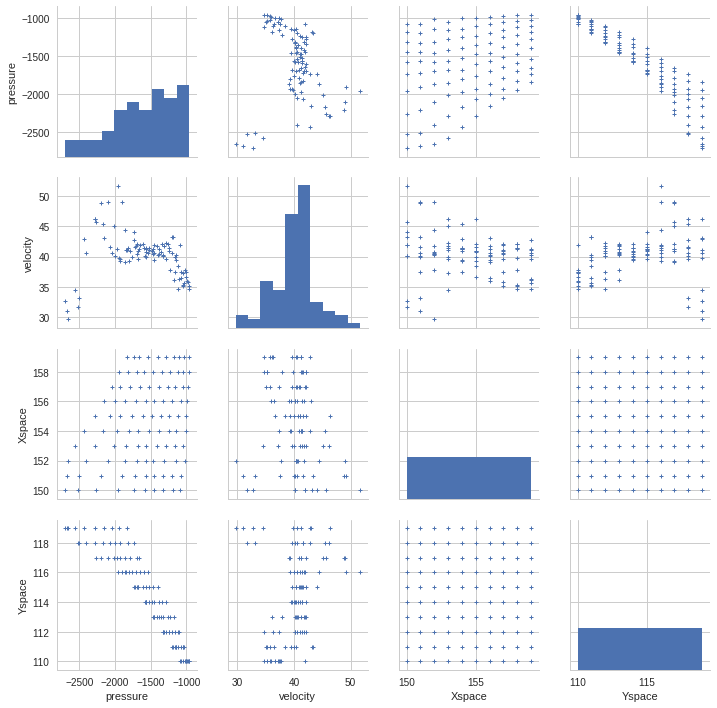

In [20]:
show_blockwise_JD(downSampled_Array[:,290,:],stepSize*stepSize)

In [21]:
#create individual histograms for the block data per variable
ds_Hist_cdf = np.zeros((numVar+2,(YDIM/stepSize)*(XDIM/stepSize),32))
ds_Hist_binEdges = np.zeros((numVar+2,(YDIM/stepSize)*(XDIM/stepSize),33))


for i in range(0,(YDIM/stepSize)*(XDIM/stepSize)):
    hist0, bin_edges0 = np.histogram(downSampled_Array[0][i], density=True, bins=32)
    cdf0 = np.cumsum(hist0*np.diff(bin_edges0))
    ds_Hist_cdf[0][i] = cdf0
    ds_Hist_binEdges[0][i] = bin_edges0
    
    hist1, bin_edges1 = np.histogram(downSampled_Array[1][i], density=True, bins=32)
    cdf1 = np.cumsum(hist1*np.diff(bin_edges1))
    ds_Hist_cdf[1][i] = cdf1
    ds_Hist_binEdges[1][i] = bin_edges1
    
    hist2, bin_edges2 = np.histogram(downSampled_Array[2][i], density=True, bins=32)
    cdf2 = np.cumsum(hist2*np.diff(bin_edges2))
    ds_Hist_cdf[2][i] = cdf2
    ds_Hist_binEdges[2][i] = bin_edges2
    
    hist3, bin_edges3 = np.histogram(downSampled_Array[3][i], density=True, bins=32)
    cdf3 = np.cumsum(hist3*np.diff(bin_edges3))
    ds_Hist_cdf[3][i] = cdf3
    ds_Hist_binEdges[3][i] = bin_edges3

In [22]:
print ds_Hist_cdf[2][100]
print ds_Hist_cdf[3][100]

[ 0.1  0.1  0.1  0.2  0.2  0.2  0.2  0.3  0.3  0.3  0.4  0.4  0.4  0.4  0.5
  0.5  0.5  0.6  0.6  0.6  0.6  0.7  0.7  0.7  0.8  0.8  0.8  0.8  0.9  0.9
  0.9  1. ]
[ 0.1  0.1  0.1  0.2  0.2  0.2  0.2  0.3  0.3  0.3  0.4  0.4  0.4  0.4  0.5
  0.5  0.5  0.6  0.6  0.6  0.6  0.7  0.7  0.7  0.8  0.8  0.8  0.8  0.9  0.9
  0.9  1. ]


In [23]:
def show_block_CDFs(blockID):
    plt.plot(ds_Hist_cdf[0][blockID])
    plt.plot(ds_Hist_cdf[1][blockID])
    plt.plot(ds_Hist_cdf[2][blockID])
    plt.plot(ds_Hist_cdf[3][blockID])
    plt.show()


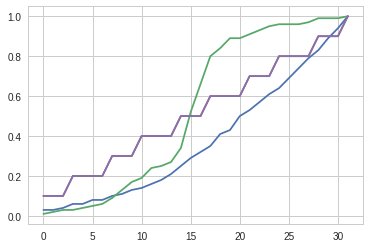

In [24]:
show_block_CDFs(290)

In [25]:
#compute the pairwise correlation coeff
#we have 6 pairs in this case
ds_correl = np.zeros((6,(YDIM/stepSize)*(XDIM/stepSize)))
for i in range(0,(YDIM/stepSize)*(XDIM/stepSize)):
    ds_correl[0][i] = stats.pearsonr(downSampled_Array[0][i],downSampled_Array[1][i])[0]
    ds_correl[1][i] = stats.pearsonr(downSampled_Array[0][i],downSampled_Array[2][i])[0]
    ds_correl[2][i] = stats.pearsonr(downSampled_Array[0][i],downSampled_Array[3][i])[0]
    ds_correl[3][i] = stats.pearsonr(downSampled_Array[1][i],downSampled_Array[2][i])[0]
    ds_correl[4][i] = stats.pearsonr(downSampled_Array[1][i],downSampled_Array[3][i])[0]
    ds_correl[5][i] = stats.pearsonr(downSampled_Array[2][i],downSampled_Array[3][i])[0]

In [26]:
print ds_correl[:,200]

[-0.16504844 -0.51618975 -0.07264124  0.37507301 -0.13038613  0.        ]


In [27]:
def inverseCDFofHistogram(support, cdfValue, unifValue):
    maxCDF = max(cdfValue)
    minCDF = min(cdfValue)
    #print maxCDF
    #print minCDF
    if unifValue > maxCDF or unifValue < minCDF:
        if unifValue > maxCDF:
            unifValue = maxCDF
        if unifValue < minCDF:
            unifValue = minCDF
        
    if unifValue > maxCDF or unifValue < minCDF:
        #print unifValue
        raise ValueError('A very specific bad thing happened')
        return -1000
    else:
        l = support.shape
        for i in range(0,l[0]):
            if unifValue >= cdfValue[i] and unifValue <= cdfValue[i+1]:
                left = i;
                right = i+1;
                ratio = (unifValue-cdfValue[i])/(cdfValue[i+1]-cdfValue[i])
                value = ratio * (support[i+1]-support[i]) + support[i]
                return value

In [32]:
#reconstruction using mote-carlo sampling
recon_data0 = np.zeros(((numVar, YDIM,XDIM)))

for y in range(0,YDIM/stepSize):
    for x in range(0,XDIM/stepSize):
        #construct the correlation matrix 
        correl_matrix = np.zeros((numVar+2,numVar+2))
        
        correl_matrix[0][0] = 1.0
        correl_matrix[0][1] = ds_correl[0][y*(XDIM/stepSize) + x]
        correl_matrix[0][2] = ds_correl[1][y*(XDIM/stepSize) + x]
        correl_matrix[0][3] = ds_correl[2][y*(XDIM/stepSize) + x]
        
        correl_matrix[1][0] = correl_matrix[0][1]
        correl_matrix[1][1] = 1.0 
        correl_matrix[1][2] = ds_correl[3][y*(XDIM/stepSize) + x]
        correl_matrix[1][3] = ds_correl[4][y*(XDIM/stepSize) + x]
        
        correl_matrix[2][0] = correl_matrix[0][2] 
        correl_matrix[2][1] = correl_matrix[1][2]
        correl_matrix[2][2] = 1.0
        correl_matrix[2][3] = ds_correl[5][y*(XDIM/stepSize) + x]
        
        correl_matrix[3][0] = correl_matrix[0][3]
        correl_matrix[3][1] = correl_matrix[1][3]
        correl_matrix[3][2] = correl_matrix[2][3]
        correl_matrix[3][3] = 1.0
        
        mean_vector = np.zeros((numVar+2)) #standard normals have 0 mean
        
        sampledata = np.random.multivariate_normal(mean_vector, correl_matrix, 1000)
        uData = norm.cdf(sampledata)
        MVsamples = np.zeros((1000,numVar+2))
        for k in range(0,1000):
            MVsamples[k][0] = inverseCDFofHistogram(ds_Hist_binEdges[0][y*(XDIM/stepSize) + x], ds_Hist_cdf[0][y*(XDIM/stepSize) + x], uData[k,0])
            MVsamples[k][1] = inverseCDFofHistogram(ds_Hist_binEdges[1][y*(XDIM/stepSize) + x], ds_Hist_cdf[1][y*(XDIM/stepSize) + x], uData[k,1])
            MVsamples[k][2] = inverseCDFofHistogram(ds_Hist_binEdges[2][y*(XDIM/stepSize) + x], ds_Hist_cdf[2][y*(XDIM/stepSize) + x], uData[k,2])
            MVsamples[k][3] = inverseCDFofHistogram(ds_Hist_binEdges[3][y*(XDIM/stepSize) + x], ds_Hist_cdf[3][y*(XDIM/stepSize) + x], uData[k,3])
                
              
        for yy in range(0,10):
            for xx in range(0,10):
                realY = y*10+yy
                realX = x*10+xx
                neighourCount_p = 0
                neighourCount_v = 0
                pressure_sum = 0.0
                velocity_sum = 0.0
                for k in range(0,1000):
                    dist_2 = (realX - MVsamples[k][2])*(realX - MVsamples[k][2]) + (realY - MVsamples[k][3])*(realY - MVsamples[k][3]) 
                    if dist_2 < 1:
                        if not math.isnan(MVsamples[k][0]):
                            pressure_sum += MVsamples[k][0]
                            neighourCount_p += 1
                        if not math.isnan(MVsamples[k][1]):
                            velocity_sum += MVsamples[k][1]
                            neighourCount_v += 1
                if neighourCount_p != 0:
                    recon_data0[0][realY][realX] = pressure_sum/neighourCount_p
                else:
                    rand_t = np.random.randint(1000, size=1)
                    recon_data0[0][realY][realX] = MVsamples[rand_t[0]][0]
                if neighourCount_v != 0:
                    recon_data0[1][realY][realX] = velocity_sum/neighourCount_v
                else:
                    rand_t = np.random.randint(1000, size=1)
                    recon_data0[1][realY][realX] = MVsamples[rand_t[0]][1]
                
        print "[" + str(y) + "][" + str(x) + "]"

/home/hazarika/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


[0][0]
[0][1]
[0][2]
[0][3]
[0][4]
[0][5]
[0][6]
[0][7]
[0][8]
[0][9]
[0][10]
[0][11]
[0][12]
[0][13]
[0][14]
[0][15]
[0][16]
[0][17]
[0][18]
[0][19]
[0][20]
[0][21]
[0][22]
[0][23]
[0][24]
[1][0]
[1][1]
[1][2]
[1][3]
[1][4]
[1][5]
[1][6]
[1][7]
[1][8]
[1][9]
[1][10]
[1][11]
[1][12]
[1][13]
[1][14]
[1][15]
[1][16]
[1][17]
[1][18]
[1][19]
[1][20]
[1][21]
[1][22]
[1][23]
[1][24]
[2][0]
[2][1]
[2][2]
[2][3]
[2][4]
[2][5]
[2][6]
[2][7]
[2][8]
[2][9]
[2][10]
[2][11]
[2][12]
[2][13]
[2][14]
[2][15]
[2][16]
[2][17]
[2][18]
[2][19]
[2][20]
[2][21]
[2][22]
[2][23]
[2][24]
[3][0]
[3][1]
[3][2]
[3][3]
[3][4]
[3][5]
[3][6]
[3][7]
[3][8]
[3][9]
[3][10]
[3][11]
[3][12]
[3][13]
[3][14]
[3][15]
[3][16]
[3][17]
[3][18]
[3][19]
[3][20]
[3][21]
[3][22]
[3][23]
[3][24]
[4][0]
[4][1]
[4][2]
[4][3]
[4][4]
[4][5]
[4][6]
[4][7]
[4][8]
[4][9]
[4][10]
[4][11]
[4][12]
[4][13]
[4][14]
[4][15]
[4][16]
[4][17]
[4][18]
[4][19]
[4][20]
[4][21]
[4][22]
[4][23]
[4][24]
[5][0]
[5][1]
[5][2]
[5][3]
[5][4]
[5][5]
[5][6]
[

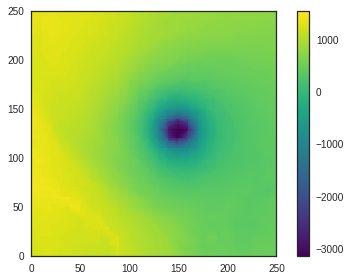

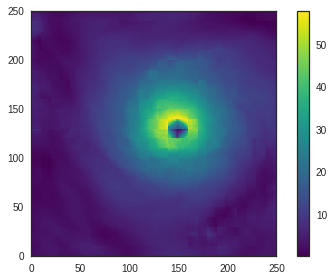

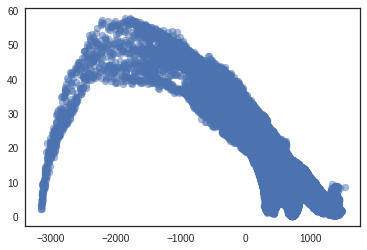

In [34]:
sns.set_style("white")
showImage(recon_data0[0])
showImage(recon_data0[1])
#scatter plot of the MV
plt.scatter(recon_data0[0].flatten(), recon_data0[1].flatten(), alpha=0.5)
plt.show()

In [35]:
#reconstruction using mote-carlo sampling : without storing the spatial histograms
recon_data1 = np.zeros(((numVar, YDIM,XDIM)))

for y in range(0,YDIM/stepSize):
    for x in range(0,XDIM/stepSize):
        #construct the correlation matrix 
        correl_matrix = np.zeros((numVar+2,numVar+2))
        
        correl_matrix[0][0] = 1.0
        correl_matrix[0][1] = ds_correl[0][y*(XDIM/stepSize) + x]
        correl_matrix[0][2] = ds_correl[1][y*(XDIM/stepSize) + x]
        correl_matrix[0][3] = ds_correl[2][y*(XDIM/stepSize) + x]
        
        correl_matrix[1][0] = correl_matrix[0][1]
        correl_matrix[1][1] = 1.0 
        correl_matrix[1][2] = ds_correl[3][y*(XDIM/stepSize) + x]
        correl_matrix[1][3] = ds_correl[4][y*(XDIM/stepSize) + x]
        
        correl_matrix[2][0] = correl_matrix[0][2] 
        correl_matrix[2][1] = correl_matrix[1][2]
        correl_matrix[2][2] = 1.0
        correl_matrix[2][3] = ds_correl[5][y*(XDIM/stepSize) + x]
        
        correl_matrix[3][0] = correl_matrix[0][3]
        correl_matrix[3][1] = correl_matrix[1][3]
        correl_matrix[3][2] = correl_matrix[2][3]
        correl_matrix[3][3] = 1.0
        
        mean_vector = np.zeros((numVar+2)) #standard normals have 0 mean
        
        sampledata = np.random.multivariate_normal(mean_vector, correl_matrix, 1000)
        uData = norm.cdf(sampledata)
        MVsamples = np.zeros((1000,numVar+2))
        for k in range(0,1000):
            MVsamples[k][0] = inverseCDFofHistogram(ds_Hist_binEdges[0][y*(XDIM/stepSize) + x], ds_Hist_cdf[0][y*(XDIM/stepSize) + x], uData[k,0])
            MVsamples[k][1] = inverseCDFofHistogram(ds_Hist_binEdges[1][y*(XDIM/stepSize) + x], ds_Hist_cdf[1][y*(XDIM/stepSize) + x], uData[k,1])
            MVsamples[k][2] = uData[k,2]*stepSize + x*stepSize
            MVsamples[k][3] = uData[k,3]*stepSize + y*stepSize
                
              
        for yy in range(0,10):
            for xx in range(0,10):
                realY = y*10+yy
                realX = x*10+xx
                neighourCount_p = 0
                neighourCount_v = 0
                pressure_sum = 0.0
                velocity_sum = 0.0
                for k in range(0,1000):
                    dist_2 = (realX - MVsamples[k][2])*(realX - MVsamples[k][2]) + (realY - MVsamples[k][3])*(realY - MVsamples[k][3]) 
                    if dist_2 < 1:
                        if not math.isnan(MVsamples[k][0]):
                            pressure_sum += MVsamples[k][0]
                            neighourCount_p += 1
                        if not math.isnan(MVsamples[k][1]):
                            velocity_sum += MVsamples[k][1]
                            neighourCount_v += 1
                if neighourCount_p != 0:
                    recon_data1[0][realY][realX] = pressure_sum/neighourCount_p
                else:
                    rand_t = np.random.randint(1000, size=1)
                    recon_data1[0][realY][realX] = MVsamples[rand_t[0]][0]
                if neighourCount_v != 0:
                    recon_data1[1][realY][realX] = velocity_sum/neighourCount_v
                else:
                    rand_t = np.random.randint(1000, size=1)
                    recon_data1[1][realY][realX] = MVsamples[rand_t[0]][1]
                
        print "[" + str(y) + "][" + str(x) + "]"

[0][0]


/home/hazarika/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


[0][1]
[0][2]
[0][3]
[0][4]
[0][5]
[0][6]
[0][7]
[0][8]
[0][9]
[0][10]
[0][11]
[0][12]
[0][13]
[0][14]
[0][15]
[0][16]
[0][17]
[0][18]
[0][19]
[0][20]
[0][21]
[0][22]
[0][23]
[0][24]
[1][0]
[1][1]
[1][2]
[1][3]
[1][4]
[1][5]
[1][6]
[1][7]
[1][8]
[1][9]
[1][10]
[1][11]
[1][12]
[1][13]
[1][14]
[1][15]
[1][16]
[1][17]
[1][18]
[1][19]
[1][20]
[1][21]
[1][22]
[1][23]
[1][24]
[2][0]
[2][1]
[2][2]
[2][3]
[2][4]
[2][5]
[2][6]
[2][7]
[2][8]
[2][9]
[2][10]
[2][11]
[2][12]
[2][13]
[2][14]
[2][15]
[2][16]
[2][17]
[2][18]
[2][19]
[2][20]
[2][21]
[2][22]
[2][23]
[2][24]
[3][0]
[3][1]
[3][2]
[3][3]
[3][4]
[3][5]
[3][6]
[3][7]
[3][8]
[3][9]
[3][10]
[3][11]
[3][12]
[3][13]
[3][14]
[3][15]
[3][16]
[3][17]
[3][18]
[3][19]
[3][20]
[3][21]
[3][22]
[3][23]
[3][24]
[4][0]
[4][1]
[4][2]
[4][3]
[4][4]
[4][5]
[4][6]
[4][7]
[4][8]
[4][9]
[4][10]
[4][11]
[4][12]
[4][13]
[4][14]
[4][15]
[4][16]
[4][17]
[4][18]
[4][19]
[4][20]
[4][21]
[4][22]
[4][23]
[4][24]
[5][0]
[5][1]
[5][2]
[5][3]
[5][4]
[5][5]
[5][6]
[5][7]
[

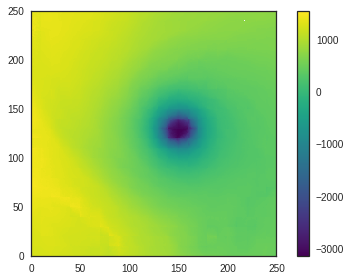

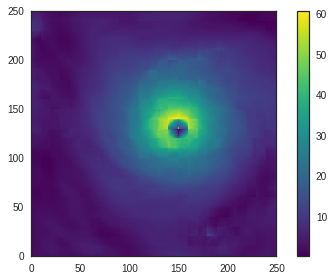

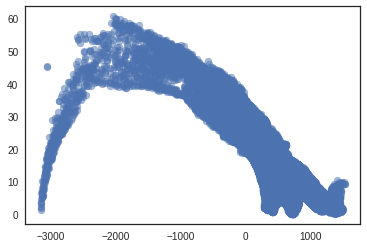

In [36]:
sns.set_style("white")
showImage(recon_data1[0])
showImage(recon_data1[1])
#scatter plot of the MV
plt.scatter(recon_data1[0].flatten(), recon_data1[1].flatten(), alpha=0.5)
plt.show()